# 非階層的クラスタ分析

In [1]:
import pandas as pd
import numpy as np

# 上記、クラスタリング用データ
data = [
    [5, 1],
    [4, 2],
    [1, 5],
    [5, 4],
    [5, 5]
]

# pandas DataFrame に変換
X = pd.DataFrame(data, columns=['attr1', 'attr2'], index=['x1', 'x2', 'x3', 'x4', 'x5'])

<img src='slides/41.png'>

In [2]:
# K-means
# - n_clusters: クラスタ数
# - init: クラスタへの割り当ての初期値
# - n_init: 上記の初期値を渡す場合、初期割り当ての試行を複数回行わないため
from sklearn.cluster import KMeans
model1 = KMeans(n_clusters=2, init=np.array([[3, 3], [4.67, 3.67]]), n_init=1)
model1.fit(X)
print('割当={}'.format(model1.labels_))
print('重心=\n{}'.format(model1.cluster_centers_))

割当=[1 1 0 1 1]
重心=
[[1.   5.  ]
 [4.75 3.  ]]


割り当ての結果は x1~x5 のラベル
```
x1 x2 x3 x4 x5
 1  1  0  1  1
```

- x3 がクラスタ0
- x1, x2, x4, x5 がクラスタ1

<img src='slides/42.png'>

In [3]:
model2 = KMeans(n_clusters=2, init=np.array([[3.33, 2.67], [5, 4.5]]), n_init=1)
model2.fit(X)
print('割当={}'.format(model2.labels_))
print('重心=\n{}'.format(model2.cluster_centers_))

割当=[0 0 0 1 1]
重心=
[[3.33333333 2.66666667]
 [5.         4.5       ]]


```
x1 x2 x3 x4 x5
 0  0  0  1  1
```

- x1, x2, x3 がクラスタ0
- x4, x5 がクラスタ1

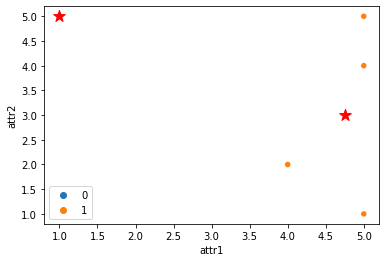

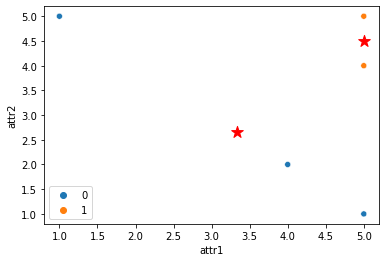

In [4]:
# 上記、2通りの割り当てを散布図にプロット
# - 重心も合わせてプロット（★）
import seaborn as sns
import matplotlib.pyplot as plt

# 例(1)の散布図
# - クラスタ 0 は x3 が 1 つだけのため、重心と重なっている
sns.scatterplot(x=X.attr1, y=X.attr2, hue=model1.labels_)
# 重心をプロット
plt.scatter(model1.cluster_centers_[:,0], model1.cluster_centers_[:,1],
            marker='*', color='red', s=150)
plt.show()

# 例(2)の散布図
sns.scatterplot(x=X.attr1, y=X.attr2, hue=model2.labels_)
# 重心をプロット
plt.scatter(model2.cluster_centers_[:,0], model2.cluster_centers_[:,1],
            marker='*', color='red', s=150)
plt.show()

<hr>

### ランダムな重心初期値の設定

割当=[1 1 0 1 1]
重心=
[[1.   5.  ]
 [4.75 3.  ]]


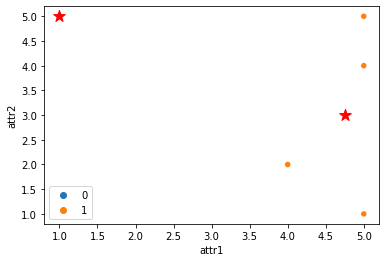

In [5]:
model = KMeans(n_clusters=2, init='random')
model.fit(X)
print('割当={}'.format(model.labels_))
print('重心=\n{}'.format(model.cluster_centers_))

# 散布図に重心をプロット
sns.scatterplot(x=X.attr1, y=X.attr2, hue=model.labels_)
plt.scatter(model1.cluster_centers_[:,0], model.cluster_centers_[:,1],
            marker='*', color='red', s=150)
plt.show()